<a href="https://colab.research.google.com/github/rlagksqls17/study_for_data_analysis/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 주성분 분석  

USArrests 데이터는 1973년 미국 50개주 10만명의 인구 당 체포 된 세 가지 강력범죄수 (assault, murder, rape)와 각 주마다 도시에 거주하는 인구의 비율(%)로 구성되어 있다. 주성분 분석을 수행하여 해당 데이터의 변수들을 가장 잘 요약하는 주성분을 구하고 해석해보자.  





In [ ]:
import pandas as pd

csv1 = pd.read_csv("/content/drive/MyDrive/학습 자료/USArrests.csv")
csv1.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


***  
  
### 원리  

먼저 주성분 분석이 어떻게 행해지는지 원리부터 알아보자.  

오일석 교수님이 지으신 기계학습 책에 따라 설명하도록 하겠다.  

만약 다음과 같은 훈련집합이 존재한다고 쳐보자.  


In [ ]:
import numpy as np

length_x1 = np.sqrt(5) 
x_1 = (2, 1)
length_x2 = np.sqrt(20) 
x_2 = (2, 4)
length_x3 = np.sqrt(17) 
x_3 = (4, 1)
length_x4 = np.sqrt(25) 
x_4 = (4, 3)

주성분 분석은 데이터를 원점 중심으로 옮겨 놓는 일부터 시작한다.  
$x_i = x_i - \mu$  

원점 중심으로 옮겨 놓은 후 각 샘플의 좌표는 다음과 같다.  

In [ ]:
# 샘플들의 x좌표 평균을 구하면
print(f"x좌표 평균 = {(2 + 2 + 4 + 4) / 4}")
# 샘플들의 y좌표 평균을 구하면
print(f"y좌표 평균 = {(1 + 4 + 1 + 3) / 4}")

# 따라서 원점 중심 변환 후 좌표는 
P_x1 = (2 - 3, 1 - 2.25)
P_x2 = (2 - 3, 4 - 2.25)
P_x3 = (4 - 3, 1 - 2.25)
P_x4 = (4 - 3, 3 - 2.25)
P_xi_list = (P_x1, P_x2, P_x3, P_x4)
print(f"변환 후 좌표 : {P_xi_list}")

x좌표 평균 = 3.0
y좌표 평균 = 2.25
변환 후 좌표 : ((-1, -1.25), (-1, 1.75), (1, -1.25), (1, 0.75))


주성분 분석시 사용하는 변환식은 다음과 같다.  

변환 후 좌표 $z = W^tx$  

**이때 W = (단위벡터)**  

만약 단위벡터를 $(1, 0)^T$로 사용한다면  
각 샘플의 좌표는 다음과 같이 코드로 구현된다.

In [ ]:
단위벡터 = np.array([[1], [0]])
x1_dot = np.dot(P_x1, 단위벡터)
x2_dot = np.dot(P_x2, 단위벡터)
x3_dot = np.dot(P_x3, 단위벡터)
x4_dot = np.dot(P_x4, 단위벡터)

print(x1_dot, x2_dot, x3_dot, x4_dot)

[-1.] [-1.] [1.] [1.]


즉 고차원 데이터를 저차원으로 변환하면 정보 손실이 일어난다. 이처럼 주성분 분석에 의한 변환은 정보 손실을 일으키는데, 정보 손실이 적을 수록 좋은 축이다.  

위와 같은 예의 경우 정보 손실을 적게하기 위해서는 단위벡터를 변경해야 한다.  

In [ ]:
단위벡터 = np.array([[1 / np.sqrt(2)], [1 / np.sqrt(2)]])
x1_dot = np.dot(P_x1, 단위벡터)
x2_dot = np.dot(P_x2, 단위벡터)
x3_dot = np.dot(P_x3, 단위벡터)
x4_dot = np.dot(P_x4, 단위벡터)

print(x1_dot, x2_dot, x3_dot, x4_dot)

[-1.59099026] [0.53033009] [-0.1767767] [1.23743687]


코드의 결과를 보면 네 좌표 모두 서로 다르게 변환 됬음을 알 수 있다.  
즉 정보 손실이 적을 것으로 보인다.  

즉 주성분 분석의 목적은 다음과 같다.  

* 정보 손실의 최소화  
* 저차원으로 변환  

기계학습에서는 훈련집합 X가 주어지면 정보 손실을 최소화하는 q개 벡터, 즉 변환 행렬 W를 찾는 것이 주 목적이다.  

**하지만 일단 위의 최초 문제를 빠르고 쉽게 푸는 것이 목적이므로, 일단 원리는 여기까지만 알아두고 문제 풀기에 집중해보자.**  

### **주성분 분석 (R)**  
먼저 R 내장 데이터 셋을 불러온다.  
> library(datasets)    

내장 데이터에 있는 USArrests 데이터 셋을 불러온다.  
> data(*USArrests*)  

그런 다음 불러온 데이터 셋의 헤드 부분을 살펴보자.  
> head(USArrests)  

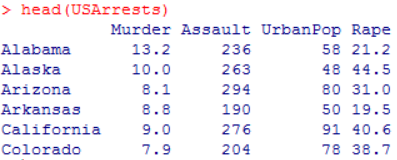

위와 같이 각 컬럼의 척도 차이가 상당하다.  
이게 무슨 뜻이냐면 "Assault" 컬럼의 경우 비율이 아닌 발생한 범죄의 수를 나타내었고, 나머지 컬럼은 비율(%)로 나타냈기 때문에 척도 차이가 크다는 것이다. 즉 샘플간의 정규화가 필요하다.  

**따라서 상관행렬을 사용하여 분석해야한다.**  
**공분산 행렬에 표준화를 추가한 것이 상관행렬의 개념이라 보면 된다.**  

그전에 산점도를 그려서 각 변수간의 관련성을 파악해보자.  

> pairs(USArrests, panel = panel.smooth, main = "USArrests data")  

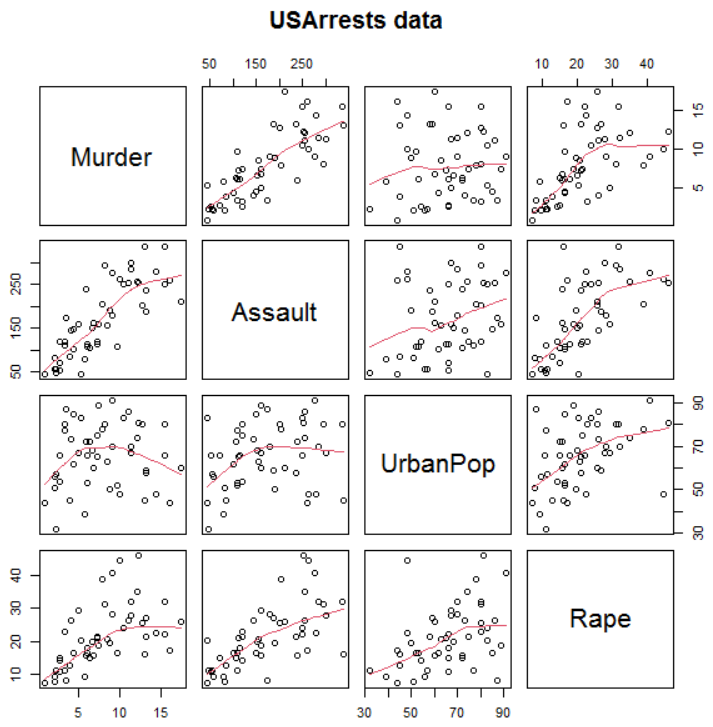





**산점도를 통해 "Murder"와 "UrbanPop" 비율간의 관련성이 작아 보이는 것을 확인 할 수 있다.**  

위에서 기술한 바와 같이 상관행렬을 이용하여 주성분 분석을 진행할땐, 두 가지 함수가 쓰인다.  

* prcomp : 특이값 분해 방법을 이용해서 데이터를 표준화하여 주성분 분석 수행한다.

* princomp : 공분산행렬, 상관행렬 방법을 이용해서 주성분 분석 수행한다.  

여기서는 princomp()함수를 이용해서 분석을 수행해본다.  

> US.prin<-princomp(USArrests, cor = TRUE)  
> summary(US.prin)  

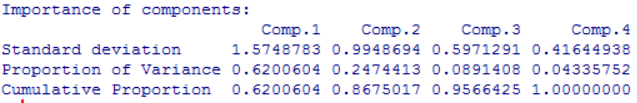



수행 후에 위와 같이 표가 도출되는데,   
Standart deviation ==  주성분의 표준편차    
Proportion of Variance == 주성분의 기여율  
Cumulative Proportioin == 누적 기여율을 말한다.  

보통 첫 번째 주성분부터 차례대로 기여율을 합한 누적 기여율이 85% 이상이 되면 해당 지점까지를 주성분의 수로 결정한다. 즉 여기서는 주성분의 수를 두 개로 결정한다.  

> US.prin$loadings  

위와 같은 함수를 통해 **네 개의 변수가 각 주성분에 기여하는 가중치인 주성분계수가 제시된다.**  

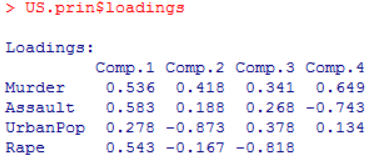



즉 여기서 제1주성분은 (0.536 * "Murder") + (0.583 \* "Assault") + (0.278 \* UrbanPop) + (0.543 \* "Rape)의 선형결합식으로 이루어져 있음을 알 수 있다.

이제 주성분들의 선형식을 통해 새롭게 계산된 각 행별 좌표를 확인해보자.  

> US.prin$scores  
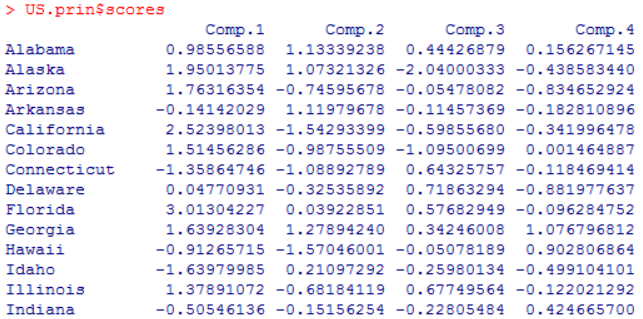


결정하기로 한 주성분이 Comp.1과 Comp.2 였으므로, 각 행마다 이 둘의 좌표를 변환 후 주성분 좌표로 보면 된다.  

> biplot(US.prin, scale = 0)  

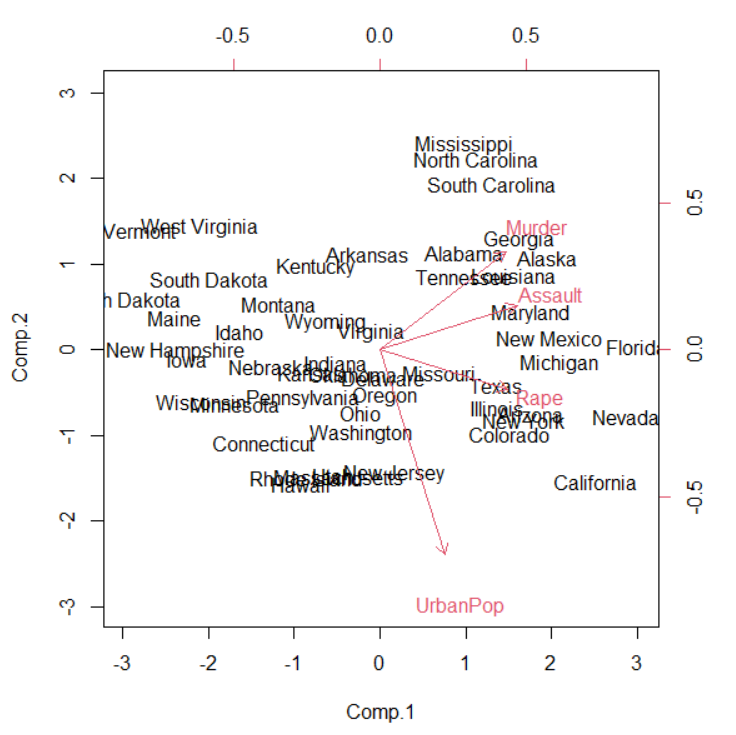

위 플롯은 제1주성분과 제2주성분으로 이루어진 좌표평면 상에 주성분점수를 산점도의 형태로 나타내었다.  

또한 각 변수에 대한 주성분 계수(각 네 개의 변수가 주성분들에 기여하는 가중치)가 화살표로 시각화되었다.  

가까운 거리와 방향일 수록 변수간의 상관성이 높다고 볼 수 있겠다.
따라서 위 플롯으로 부터 다음의 결론을 내렸다.  

* Murder 컬럼과 Assault 컬럼은 서로 간의 벡터 방향, 길이가 제일 유사하므로 선형 상관관계가 가장 크다고 말할 수 있다.  

* Murder 컬럼과 UrbanPop 컬럼은 주성분 계수 벡터가 서로 수직이므로 상관성이 가장 적다고 말할 수 있겠다.  

* California 행은 다른 행보다 거리상으로 조금 더 떨어져있다. 위 플롯은 모든 변수를 주성분 1, 2에 관해 정규화 한 것임으로, 정규화해도 거리가 저만큼 벌어진다는 것은 이상치의 가능성이 있다는 것이라고 생각된다. 따라서 저것이 이상치인지 조사하는 과정이 필요하다.  

### 주성분 분석 (파이썬)  

이제 파이썬으로 주성분 분석을 해보겠다.  

In [ ]:
# 먼저 USArrests.csv 파일을 불러온다. 
import pandas as pd

csv1 = pd.read_csv("/content/drive/MyDrive/학습 자료/USArrests.csv")
csv1.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f343e3b9e50>,
      dtype=object)

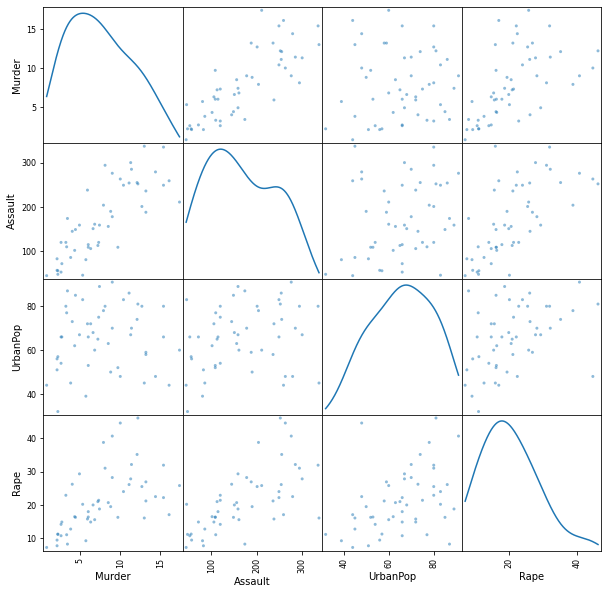

In [ ]:
# 이후 산점도를 그려 변수 간 상관관계를 파악한다.
from pandas.plotting import scatter_matrix
scatter_matrix(csv1, alpha = 0.5, figsize = (10, 10), diagonal = 'kde')

In [ ]:
# 표준화를 수행한다.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = csv1[csv1.columns[0:4]] # 문자열이 있는 컬럼은 제외한다.  
x = StandardScaler().fit_transform(data) # x객체에 표준화 데이터 저장 
pd.DataFrame(x, columns = ["Murder", "Assault", "UrbanPop", "Rape"]).head() 

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [ ]:
# 활용 가능한 주성분 갯수를 알아본다.
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 

pca = PCA()
pca.fit(x)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
print(exp_var_cumul)
# 주성분 계수를 확인한다.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# 주성분 점수를 확인한다.
components = pca.fit_transform(x)
# 주성분에 의한 행렬도를 그려본다. 
fig = px.scatter(components, x = 0, y = 1)

features = ["Murder", "Assault", "UrbanPop", "Rape"]

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

[0.62006039 0.86750168 0.95664248 1.        ]
